In [1]:
%pylab
%matplotlib inline
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn import svm
def readfile(filename, n,d):
    y = np.zeros(n) # targets
    X = np.zeros((n,d)) # input matrix each row is a sample data point
    li = 0 
    with open(filename, "rb") as f:
        for line in f:
           if li>=n : 
             break;
           parts = line.split()
           y[li] = float(parts[0])
           for i in range(len(parts)): 
                if i >0 and parts[i] != '\n': 
                    fparts = parts[i].split(":")
                    X[li,int(fparts[0])-1] = float(fparts[1])
           li = li +1
    return (y,X)


Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [2]:
def dots_sample(X,y,steps,d,n,num_rep,run_svm = False):
    tracks = np.zeros(steps)
    sample_sizes = np.zeros(steps)
    for i in range(steps): 
        norms = 0
        for j in range(num_rep):
            rperm = np.random.permutation(n)
            isize = min( 500*pow(2,i),n)
            sample_sizes[i] = isize
            Xs = X[rperm[1:isize],:]
            ys = y[rperm[1:isize]]
            #clf = LogisticRegression(C=1.0)
            if run_svm :
             clf =  svm.LinearSVC(loss = 'hinge', C = 1.0, tol = 0.0000001, max_iter = 10000000, fit_intercept=True)
            else :  
             clf = LogisticRegression(C=1.0)
            clf.fit(Xs,ys) # s is lambda matrix in the write-up and  U and V are changed here
            norms = norms + np.dot(clf.coef_,np.transpose(clf.coef_))
        tracks[i] = norms/float(num_rep)
    plt.plot(sample_sizes,tracks)
    #plt.plot(sample_sizes,np.sqrt(sample_sizes))
    #plt.plot(sample_sizes,40*np.log(sample_sizes))


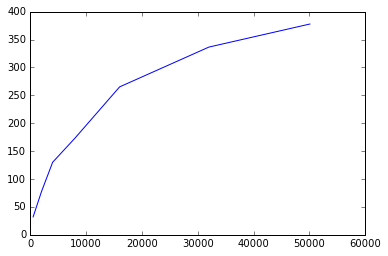

In [3]:
n = 50101; 
d = 54; 

filename = "../datasets/covtype.libsvm.binary.scale"
y, X = readfile(filename,n,d)
num_rep = 3
steps = 8
for i in range(n):
    if(y[i] == 2 or y[i] == 0):
        y[i] = -1;
dots_sample(X,y,steps,d,n,num_rep,run_svm=False)

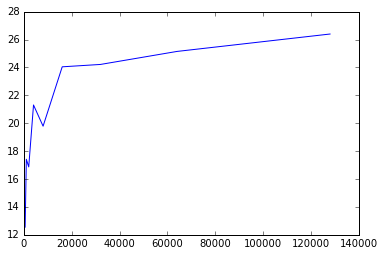

In [4]:
n = 128101; 
d = 18; 

filename = "../datasets/SUSY"
y, X = readfile(filename,n,d)
num_rep = 3
steps = 9
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
dots_sample(X,y,steps,d,n,num_rep,run_svm=True)

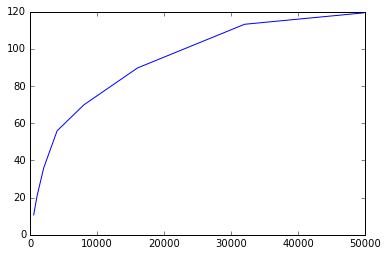

In [5]:
n = 49749; 
d = 300; 
filename = "../datasets/w8a"
y, X = readfile(filename,n,d)
num_rep = 4
steps = 8
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
dots_sample(X,y,steps,d,n,num_rep,run_svm=True)

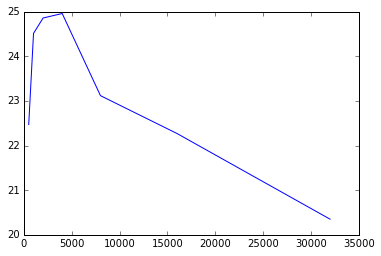

In [6]:
n = 32561; 
d = 123; 
filename = "../datasets/a9a"
y, X = readfile(filename,n,d)
for i in range(n):
    if(y[i]==2 or y[i] == 0):
        y[i] = -1;
steps = 7
num_rep = 10
dots_sample(X,y,steps,d,n,num_rep,run_svm= True)

0.959954249181


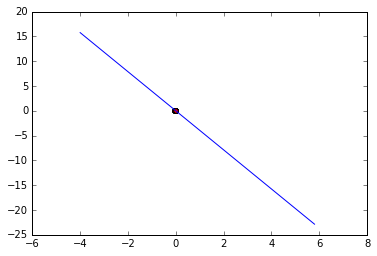

In [29]:
mu1 = [0.00001,0.00001]
mu2 = [0,0]
sig1 = np.zeros((2,2))
n = 100000
sig1[1,1] = 0.00001 
sig1[0,0] = 0.00001
sig2 = sig1 
x1 = np.random.multivariate_normal(mu1,sig1,n)
x2 = np.random.multivariate_normal(mu2,sig2,n)
x = np.zeros((2*n,2))
x[0:n,:] = x1
x[n:2*n,:] = x2
y = np.ones((2*n,1))
y[n:-1] = -1
scatter(x1[:,0],x1[:,1],c='b')
scatter(x2[:,0],x2[:,1],c ='r')
clf = LogisticRegression(C=1.0,tol=0.0000001,max_iter=100000) 
clf.fit(x,y)
l = np.zeros((50,2))
for i in range(50): 
    a = -4 + i/float(5)
    b = (-clf.intercept_ - clf.coef_[0,0]*a)/clf.coef_[0,1]
    l[i,0] = a 
    l[i,1] = b
plot(l[:,0],l[:,1])
print(np.linalg.norm(clf.coef_))

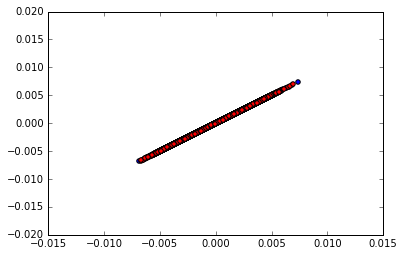

In [30]:
xp = x
alphas = np.zeros(2*n)
for i in range(2*n): 
    a = -y[i]*(np.dot(clf.coef_,x[i,:])+clf.intercept_)
    alphas[i] = math.exp(a)/(1+math.exp(a))
    xp[i,:] = -1*y[i]*x[i,:]* math.exp(a)/(1+math.exp(a))
scatter(xp[0:n,1],xp[0:n,1],c='b')
scatter(xp[n:2*n,1],xp[n:2*n,1],c='r')


In [31]:
np.linalg.norm(clf.coef_)

0.95995424918066519

(array([  1.99999000e+05,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2.02989608e-08,   9.99928549e-02,   1.99985689e-01,
          2.99978524e-01,   3.99971359e-01,   4.99964193e-01,
          5.99957028e-01,   6.99949862e-01,   7.99942697e-01,
          8.99935532e-01,   9.99928366e-01]),
 <a list of 10 Patch objects>)

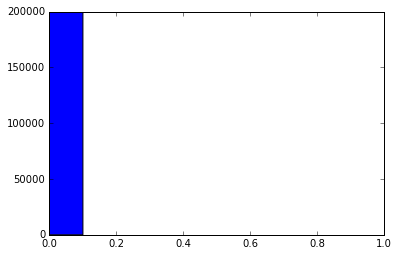

In [102]:
plt.hist(alphas)

In [15]:
ps = np.zeros(size(range(1,13,1)))
norms = np.zeros(size(ps))
for i in range(1,12,1): 
   ep = 0.01
   p = 1.8*pow(2,-i);
   for j in range(20,21,1):
     n = pow(2,j)
     #p = pow(math.log(n),3)/float(n)
     x = np.zeros((2*n,2))
     y = np.zeros(2*n)
     z = np.zeros((2*n,2))
     for k in range(n): 
        r = np.random.rand(1)
        if r<p:
          x[k,0] = ep
        else: 
          x[k,0] = 1
        y[k] = 1
        z[k,0] = -1*x[k,0]*y[k]
     for k in range(n): 
        r = np.random.rand(1)
        if r<p:
          x[k+n,0] = -ep
        else: 
          x[k+n,0] = -1
        y[k+n] = -1
        z[k+n,0] = -1*x[k+n,0]*y[k+n]
     clf = LogisticRegression(C=1.0) 
     clf.fit(x,y)
     norm = np.dot(clf.coef_,np.transpose(clf.coef_));
     ps[i] = p 
     norms[i] = norm
     v = z[:,0]*clf.coef_[0,0]; 
     hs = np.power(x[:,0],2)*np.divide(np.exp(v),np.power(np.exp(v)+1,2))
     t = sum(hs)/n
     print('p={},n={},norm={},eps={}, t ={}'.format(p,n,norm,ep,t))

p=0.9,n=1048576,norm=[[ 149542.45152331]],eps=0.01, t =3.61241262606e-06
p=0.45,n=1048576,norm=[[ 109753.68738]],eps=0.01, t =3.05097087748e-06
p=0.225,n=1048576,norm=[[ 76601.38197454]],eps=0.01, t =2.50260749516e-06
p=0.1125,n=1048576,norm=[[ 48915.30821378]],eps=0.01, t =2.0047449266e-06
p=0.05625,n=1048576,norm=[[ 29089.23212692]],eps=0.01, t =1.4630967624e-06
p=0.028125,n=1048576,norm=[[ 15104.80322658]],eps=0.01, t =9.86900841451e-07
p=0.0140625,n=1048576,norm=[[ 7522.06940321]],eps=0.01, t =5.87872062337e-07
p=0.00703125,n=1048576,norm=[[ 1082.03173399]],eps=0.01, t =3.4833446132e-07
p=0.003515625,n=1048576,norm=[[ 138.47241326]],eps=0.01, t =1.56267105339e-05
p=0.0017578125,n=1048576,norm=[[ 128.65441727]],eps=0.01, t =2.37589746185e-05
p=0.00087890625,n=1048576,norm=[[ 124.78615018]],eps=0.01, t =2.81784392713e-05


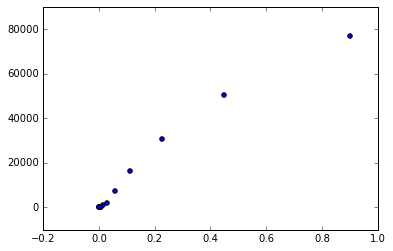

In [9]:
plt.scatter(ps,norms)

In [100]:
clf.coef_

array([[ 8.3778537,  0.       ]])

(array([ 32733.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,     35.]),
 array([-8.279251  , -7.45215382, -6.62505665, -5.79795947, -4.9708623 ,
        -4.14376512, -3.31666795, -2.48957077, -1.6624736 , -0.83537643,
        -0.00827925]),
 <a list of 10 Patch objects>)

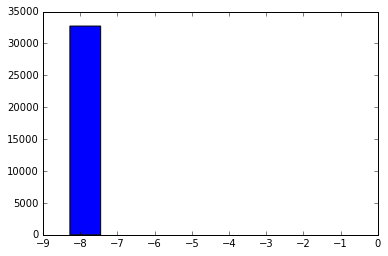

In [112]:
plt.hist(v)

In [113]:
v

array([-8.279251, -8.279251, -8.279251, ..., -8.279251, -8.279251,
       -8.279251])

(array([  2.04000000e+02,   1.08020000e+04,   1.24450000e+04,
          3.91600000e+03,   8.59000000e+02,   3.81000000e+02,
          1.87000000e+02,   6.00000000e+01,   2.50000000e+01,
          1.10000000e+01]),
 array([-6.6686388 , -5.55095096, -4.43326311, -3.31557526, -2.19788741,
        -1.08019956,  0.03748829,  1.15517614,  2.27286399,  3.39055184,
         4.50823968]),
 <a list of 10 Patch objects>)

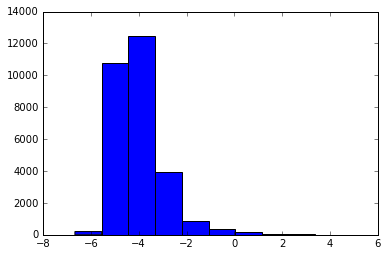

In [7]:
n = 50101; 
d = 54; 

filename = "../datasets/covtype.libsvm.binary.scale"
y, X = readfile(filename,n,d)
num_rep = 3
steps = 8
for i in range(n):
    if(y[i] == 2 or y[i] == 0):
        y[i] = -1;
m = LogisticRegression(C = 1.0)
fm = m.fit(X,y)
w = fm.coef_
dots = np.dot(X[y<0],np.transpose(w))
plt.hist(dots)

In [51]:
def grad_logistic(w,X,y,lambd): 
    n, d = X.shape
    g = np.zeros(d)
    for i in range(n):
        dot = y[i]*np.dot(X[i,:],np.transpose(w))
        g = np.add(g,(-1*y[i]/(exp(dot)+1))*X[i,:]/float(n))
    g = np.add(g,lambd*w)
    return g,1.0
def risk_logistic(w,X,y,lambd): 
    n, d = X.shape
    error = 0 
    for i in range(n): 
        error = error + math.log(1+exp(-y[i]*np.dot(X[i,:],np.transpose(w))))/float(n)
    error += 0.5*lambd*pow(np.linalg.norm(w),2)
    return error
    
def gradient_desc(X,y,lambd,step_size,grad,risk,itrs, w0 = None): 
    n, d = X.shape
    if(w0 is  None): 
        w = np.zeros(d)
    else:
        w = w0
    effective_iters = 0
    stat = [0,risk(w,X,y,lambd)]
    while effective_iters < itrs: 
        g, c = grad(w,X,y,lambd) 
        w = w -step_size*g
        effective_iters = effective_iters+c
        risk_value = risk(w,X,y,lambd)
        n_stat = [effective_iters,risk_value]
        stat = np.c_[stat,n_stat]
        #print("loss[{}]={}".format(effective_iters,risk_value))
    return stat,w
def AdaptiveGD(X,y,lambda_in,step_size,grad,risk,itrs,optimal_risk, w0 = None): 
    n, d = X.shape
    lambd = 20*lambda_in
    if(w0 is None): 
        w = np.zeros(d)
    else:
        w = w0
    effective_iters = 0
    stat = [0,risk(w,X,y,lambda_in)]
    while effective_iters < itrs: 
        g, c = grad(w,X,y,lambd) 
        w = w -step_size*g
        effective_iters = effective_iters+c
        risk_value = risk(w,X,y,lambda_in)-optimal_risk
        #lambd = 0.9*lambd
        n_stat = [effective_iters,risk_value]
        stat = np.c_[stat,n_stat]
        #print("loss[{}]={}".format(effective_iters,risk_value))
    return stat,w
def theortical_bound(X,y,lambd,step_size,risk,itrs,w0 = None): 
    n, d = X.shape
    if w0 is None: 
        w = np.zeros(d)
    else: 
        w = w0
    effective_iters = 0
    init_error = risk(w,X,y,lambd)
    stat = [0,init_error]
    while effective_iters < itrs: 
        effective_iters = effective_iters+1
        error = pow(1-2*step_size*lambd,2*effective_iters)*init_error
        n_stat = [effective_iters,error]
        stat = np.c_[stat,n_stat]
    return stat


In [82]:
def initialization(X,y,step_size,epochs,plotname): 
    fm = LogisticRegression(C = 1.0,fit_intercept=False)
    fm = m.fit(X,y)
    w_star = fm.coef_
    x_hard = X[0,:]
    for i in range(n): 
        if(np.sign(np.dot(w_star,X[i,:])) != y[i]): 
            x_hard = X[i,:]
            break
    print(diag)
    lambd = 1.0/float(n)
    opt_risk = risk_logistic(w_star,X,y,lambd)
    def risk(w,X,y,lambd): 
        return risk_logistic(w,X,y,lambd) - opt_risk
    
    stat, w = gradient_desc(X,y,lambd,step_size,grad_logistic,risk,epochs)
    plt.plot(stat[0,:],np.log(stat[1,:]),label = 'w0 = 0')
    #stat2, w2 = gradient_desc(X,y,lambd,step_size,grad_logistic,risk,epochs,w0 = x_hard)
    #plt.plot(stat2[0,:],np.log(stat2[1,:]),label = 'w0 = 1')
    stat3 =  theortical_bound(X,y,lambd,step_size,risk,epochs,w0 = None)
    plt.plot(stat3[0,:],np.log(stat3[1,:]),label = 'theoretical')
    lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=5)
    plt.savefig(plotname, facecolor='w', edgecolor='w', orientation='portrait',  format='eps', bbox_extra_artists=(lgd,), bbox_inches='tight')

[  1.88674678e+00   3.94087208e-01  -3.02272790e-01   2.07013050e-01
   1.06322698e-01   1.01056468e-01   8.67710002e-02   5.86016382e-02
   5.02238986e-02   4.02370978e-02   3.31576264e-02   3.09374518e-02
   2.78244951e-02   2.62434149e-02   2.55207864e-02   2.37575374e-02
   2.28440813e-02   2.20418377e-02   2.14251410e-02   2.12640055e-02
   2.09897933e-02   1.97639630e-02   1.80331511e-02   1.61093181e-02
   1.45966701e-02   1.43703436e-02   1.36044540e-02   1.20709804e-02
   1.15659106e-02   1.08253445e-02   9.29021074e-03   8.95075650e-03
   6.67747177e-03   5.45548386e-03   3.86268366e-03   3.72667155e-03
   2.30482870e-03   1.94194783e-03   1.81854219e-03   1.66502867e-03
   1.07882456e-03   9.72422753e-04   7.44354345e-04   5.41800223e-04
   5.03823736e-04   3.01741369e-04   3.27712910e-04   3.49497724e-04
   2.41069308e-05   3.50458172e-05   3.32575133e-05  -5.62551366e-18
   0.00000000e+00   0.00000000e+00]


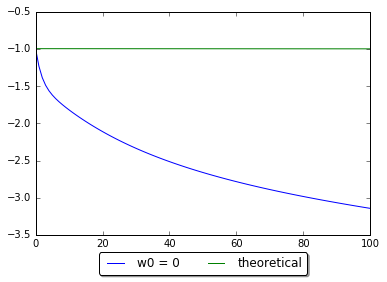

In [83]:
n = 32561; 
d = 123;
filename = "../datasets/a9a"
plotname = 'plot/logistic_gd_a9a.eps'
epochs = 100
y, X = readfile(filename,n,d)
step_size = 0.2
num_rep = 3
for i in range(n):
    if(y[i] == 2 or y[i] == 0):
        y[i] = -1;
initialization(X,y,step_size,epochs,plotname)

[  1.88674678e+00   3.94087208e-01  -3.02272790e-01   2.07013050e-01
   1.06322698e-01   1.01056468e-01   8.67710002e-02   5.86016382e-02
   5.02238986e-02   4.02370978e-02   3.31576264e-02   3.09374518e-02
   2.78244951e-02   2.62434149e-02   2.55207864e-02   2.37575374e-02
   2.28440813e-02   2.20418377e-02   2.14251410e-02   2.12640055e-02
   2.09897933e-02   1.97639630e-02   1.80331511e-02   1.61093181e-02
   1.45966701e-02   1.43703436e-02   1.36044540e-02   1.20709804e-02
   1.15659106e-02   1.08253445e-02   9.29021074e-03   8.95075650e-03
   6.67747177e-03   5.45548386e-03   3.86268366e-03   3.72667155e-03
   2.30482870e-03   1.94194783e-03   1.81854219e-03   1.66502867e-03
   1.07882456e-03   9.72422753e-04   7.44354345e-04   5.41800223e-04
   5.03823736e-04   3.01741369e-04   3.27712910e-04   3.49497724e-04
   2.41069308e-05   3.50458172e-05   3.32575133e-05  -5.62551366e-18
   0.00000000e+00   0.00000000e+00]


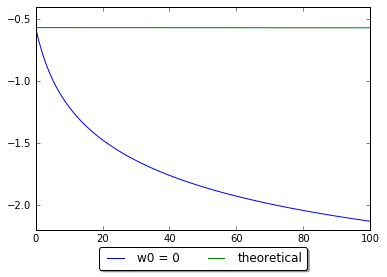

In [75]:
n = 49749; 
d = 300; 
filename = "../datasets/w8a"
plotname = 'plot/logistic_gd_w8a.eps'
epochs = 100
y, X = readfile(filename,n,d)
step_size = 0.2
num_rep = 3
for i in range(n):
    if(y[i] == 2 or y[i] == 0):
        y[i] = -1;
initialization(X,y,step_size,epochs,plotname)

In [128]:
stat2, w2 = AdaptiveGD(X,y,lambd,0.2,grad_logistic,risk_logistic,100,opt_risk)

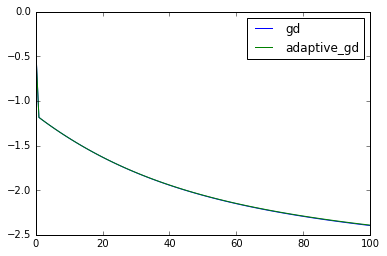

In [129]:
plt.plot(stat[0,:],np.log(stat[1,:]),label='gd')
plt.plot(stat2[0,:],np.log(stat2[1,:]),label='adaptive_gd')
plt.legend()